In [1]:
#importing stats library
import numpy as np
import pandas as pd
import scipy.stats
from scipy.stats import zscore,boxcox
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#uploading the amazon dataset
DF=pd.read_excel('C://Users//Admin//Desktop//Ratings Prediction Project//AMAZON.XLSX')
DF

,Title,Review_Text,Ratings
0,Very bad experience,Anyone looking to buy this product please don'...,2
1,मेरा product रिटर्न ले गया लेकिन रसीद नहीं दिया,मेरा पार्सल डिलिवरी बॉय २४/११/२२.को ले गया लेक...,2
2,"Not up to the mark, disappointing",Everything is good but this product not up to ...,2
3,"Product quality, Sound quality, comfortness",Product quality - product quality is good in t...,2
4,Never buy wireless from boat,I had brought this product about 10 days back....,2
...,...,...,...
26835,Cool gadget,&nbsp;Cool gadget,5
26836,Good,"Good product by Amazon, very intelligent and ...",5
26837,Super,Super,5
26838,Very well built and compact in size but delive...,I like it's magnificent sound quality and Alex...,5


In [3]:
df=DF.drop('Title',axis=1) #droping 'Title' to seperate our dependent and independent variable
df.head()

,Review_Text,Ratings
0,Anyone looking to buy this product please don'...,2
1,मेरा पार्सल डिलिवरी बॉय २४/११/२२.को ले गया लेक...,2
2,Everything is good but this product not up to ...,2
3,Product quality - product quality is good in t...,2
4,I had brought this product about 10 days back....,2


In [4]:
df.shape

(26840, 2)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26840 entries, 0 to 26839
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Review_Text  26138 non-null  object
 1   Ratings      26840 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 419.5+ KB


In [6]:
df.isnull().sum() #there are null values in our dataset

Review_Text    702
Ratings          0
dtype: int64

In [7]:
df['Review_Text'] = df['Review_Text'].replace(' ', np.nan)
df = df.dropna(axis=0, subset=['Review_Text'])

In [8]:
df['Ratings'] = df['Ratings'].replace(' ', np.nan)
df = df.dropna(axis=0, subset=['Ratings'])

In [9]:
df.isnull().sum()

Review_Text    0
Ratings        0
dtype: int64

In [10]:
df.loc[df['Review_Text'] == ' ']

,Review_Text,Ratings


In [11]:
df.loc[df['Ratings'] == ' ']

,Review_Text,Ratings


<AxesSubplot:xlabel='Ratings', ylabel='count'>

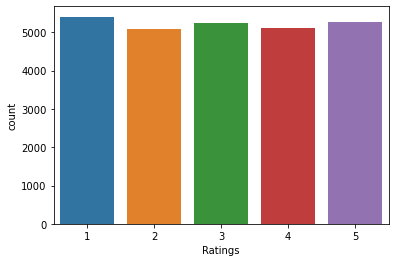

In [12]:
sns.countplot(df.Ratings) #almost ratings are same for each class

In [13]:
x=df.drop('Ratings',axis=1)
x # independent variable

,Review_Text
0,Anyone looking to buy this product please don'...
1,मेरा पार्सल डिलिवरी बॉय २४/११/२२.को ले गया लेक...
2,Everything is good but this product not up to ...
3,Product quality - product quality is good in t...
4,I had brought this product about 10 days back....
...,...
26835,&nbsp;Cool gadget
26836,"Good product by Amazon, very intelligent and ..."
26837,Super
26838,I like it's magnificent sound quality and Alex...


In [14]:
n_features = x.shape[1]
n_features #no of independent variable

1

In [15]:
y=df.Ratings
y# target

0        2
1        2
2        2
3        2
4        2
        ..
26835    5
26836    5
26837    5
26838    5
26839    5
Name: Ratings, Length: 26138, dtype: int64

In [16]:
n_class = len(np.unique(y))
n_class  #no. of classes in target

5

In [17]:
#extracting the data's
df.loc[15] #This will give all the data present in 15th row

Review_Text    Quality of the product per hardware wise is OK...
Ratings                                                        2
Name: 15, dtype: object

In [18]:
df.Review_Text.loc[15] #This will give texts column data present in 15th row

'Quality of the product per hardware wise is OK...<br>after using it for 2 weeks I have found that it frequently got disconnected from phone While you are listening to music or watching a video..<br><br>several times it is happening ...want to return the product and get my money back'

In [19]:
df.loc[25]

Review_Text    Not so good, sound quality decrease after 7-10...
Ratings                                                        2
Name: 25, dtype: object

In [20]:
df.Review_Text.loc[25]

'Not so good, sound quality decrease after 7-10 days of use, no bass found, quality is ok, battery backup is good.'

In [21]:
df.Ratings[3291]

4

In [22]:
df.Review_Text[3291]

'Sounds quality 👌'

In [23]:
print('Row"s are',df.shape[0])
print('Columns are',df.shape[1])
print('Shape is',df.shape)

Row"s are 26138
Columns are 2
Shape is (26138, 2)


In [24]:
df.dtypes

Review_Text    object
Ratings         int64
dtype: object

In [25]:
df.nunique()

Review_Text    16908
Ratings            5
dtype: int64

In [26]:
df

,Review_Text,Ratings
0,Anyone looking to buy this product please don'...,2
1,मेरा पार्सल डिलिवरी बॉय २४/११/२२.को ले गया लेक...,2
2,Everything is good but this product not up to ...,2
3,Product quality - product quality is good in t...,2
4,I had brought this product about 10 days back....,2
...,...,...
26835,&nbsp;Cool gadget,5
26836,"Good product by Amazon, very intelligent and ...",5
26837,Super,5
26838,I like it's magnificent sound quality and Alex...,5


In [27]:
df.reset_index(inplace=True)
df#reseting the index

,index,Review_Text,Ratings
0,0,Anyone looking to buy this product please don'...,2
1,1,मेरा पार्सल डिलिवरी बॉय २४/११/२२.को ले गया लेक...,2
2,2,Everything is good but this product not up to ...,2
3,3,Product quality - product quality is good in t...,2
4,4,I had brought this product about 10 days back....,2
...,...,...,...
26133,26835,&nbsp;Cool gadget,5
26134,26836,"Good product by Amazon, very intelligent and ...",5
26135,26837,Super,5
26136,26838,I like it's magnificent sound quality and Alex...,5


### Using Deep-NLP Technique
### Data cleaning and Text-Preprocessing

In [28]:
!pip install tensorflow

In [29]:
import tensorflow as tf

In [30]:
print(tf.__version__)

2.11.0


In [31]:
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential

In [32]:
#vocabulary size
voc_size=5000

In [33]:
import nltk
import re
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

In [34]:
stopwords.words('english') #displaying the stopwords of english

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [35]:
from nltk.corpus import stopwords           ###stopwords          
from nltk.stem.porter import PorterStemmer  ###stemming
ps=PorterStemmer()

In [36]:
%%time
corpus=[]
for i in range(0,len(df)):
    review=re.sub('[^a-zA-Z]', ' ',df['Review_Text'][i])  #removing all the special character from the sentences except lower and upper case alphabets
    review.lower() #lowering each sentences
    review.split() #spliting
    
    review=[ps.stem(word) for word in review if not word in stopwords.words('english')] #using stemming so that each word gets some related words that could not be meaningful and we are ignoring the words that are in stopwords.words('english')
    review=''.join(review) #joining
    corpus.append(review)   #appending the list

Wall time: 1h 37min 23s


In [37]:
corpus

['anne lkng  bu h pruc plee n  bu    the cnnecv  ver pr even fer cnnecng  he evce  cnnuul k  pr whch  ver rrng when u pen he blueh  cnnuu nfcn ge  he phne her hn he phne  whch   cnnece whch bece ver frurng ',
 '                                                                                                                                                                                                                     c c v                                   pruc                                           br                         ac  n cnr bnk               ',
 'everhng  g bu h pruc n up  he rk     cnnecng b eful when n n ue  uenl rng  ke  cll  u wll fn h    lre cnnece  whch  ver ppnng  i wll never b  gn    ee lke we f ne ',
 'pruc qul   pruc qul  g n h prce rnge  al vlble n   clr whch  g hng  br sun qul   un qul  n h uch g  per b erphne pruc  b  lu bu  her  nl b  ler hn vcl  if u ncree vlue       hen u cn len vcl ncel  sng hul hve been     kbp qul  he n hngh  br ber lfe   ber lfe  l

In [38]:
len(corpus)

26138

In [39]:
onehot=[one_hot(words,voc_size) for words in corpus]
onehot

[[3058,
  4132,
  3959,
  4779,
  116,
  225,
  685,
  3959,
  704,
  809,
  4576,
  2556,
  3999,
  2334,
  1211,
  965,
  893,
  898,
  3504,
  2556,
  2825,
  4576,
  4769,
  73,
  2029,
  3917,
  965,
  1812,
  1056,
  3381,
  3375,
  965,
  284,
  2237,
  1310,
  965,
  284,
  2825,
  630,
  2825,
  4679,
  4576,
  4420],
 [1544, 1544, 192, 116, 3550, 3549, 685, 4791, 2278],
 [4107,
  1519,
  3959,
  4779,
  116,
  685,
  4215,
  965,
  1597,
  1211,
  2636,
  1286,
  73,
  685,
  685,
  906,
  512,
  3926,
  1587,
  3208,
  2029,
  3302,
  679,
  4779,
  2194,
  630,
  2825,
  4576,
  4185,
  3065,
  3302,
  3614,
  2636,
  2131,
  1106,
  3662,
  3679,
  1531,
  256],
 [116,
  4651,
  116,
  4651,
  1519,
  685,
  4779,
  2036,
  405,
  4250,
  1035,
  685,
  3495,
  2825,
  1519,
  3849,
  3550,
  4795,
  4651,
  3864,
  4651,
  685,
  4779,
  735,
  1519,
  839,
  2636,
  3671,
  116,
  2636,
  2144,
  3959,
  2237,
  478,
  2636,
  3296,
  1310,
  1772,
  2538,
  2029,
  4860

In [40]:
corpus[4000]

'the un  n up rk l he ne cncelln  n g   br n g f u crrng   g'

In [41]:
onehot[4000]

[704,
 3864,
 685,
 4215,
 1597,
 73,
 965,
 256,
 3992,
 685,
 1519,
 3550,
 685,
 1519,
 1531,
 2029,
 4162,
 1519]

In [42]:
#embedding representations
sent_length=50
embedded_docs=pad_sequences(onehot,padding='pre',maxlen=sent_length)
print(embedded_docs)

[[   0    0    0 ... 4679 4576 4420]
 [   0    0    0 ...  685 4791 2278]
 [   0    0    0 ... 3679 1531  256]
 ...
 [   0    0    0 ...    0    0 4452]
 [   0    0    0 ... 4521 2636 3662]
 [   0    0    0 ... 4888  685 1451]]


In [43]:
embedded_docs[9]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0, 4795,
       1519, 3959,  821,  906,  965,  116,  745, 3553, 2519, 1294,  685,
        512, 2685, 1316, 1587,  965,  116, 1601, 1155, 2417, 3959, 4779,
        116,  685, 2106, 3075, 2840, 4641])

In [44]:
embedded_docs[10000]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0, 3065, 1935, 4554, 2499, 3065, 3504,  965,  284, 2987,
       2987,  319, 1531,  965,  284, 4779, 1935, 4596,  685, 1349,   73,
       1635,  685, 2987, 2237, 4191,  685,  256, 2753, 1290, 4651, 2556,
         66,  735,   73, 1519, 1241, 1087])

In [45]:
#creating model
embedding_vector_features=100
model=Sequential()
model.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
model.add(Dropout(0.3))
model.add(LSTM(300))
model.add(Dropout(0.3))
model.add(Dense(6,'softmax')) #we have 5 outputs here so we can't use output =5 because [0,5) means excluding 5
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 100)           500000    
                                                                 
 dropout (Dropout)           (None, 50, 100)           0         
                                                                 
 lstm (LSTM)                 (None, 300)               481200    
                                                                 
 dropout_1 (Dropout)         (None, 300)               0         
                                                                 
 dense (Dense)               (None, 6)                 1806      
                                                                 
Total params: 983,006
Trainable params: 983,006
Non-trainable params: 0
_________________________________________________________________
None


In [46]:
x_final=embedded_docs
y_final=y

In [47]:
!pip install -U imbalanced-learn

In [48]:
from imblearn.over_sampling import SMOTE
sm=SMOTE()
x_final,y_final=sm.fit_resample(x_final,y_final)

In [49]:
y_final.value_counts()

2    5408
3    5408
4    5408
5    5408
1    5408
Name: Ratings, dtype: int64

In [50]:
x_final.shape,y_final.shape

((27040, 50), (27040,))

In [51]:
x_final=np.array(x_final)
y_final=np.array(y_final)

In [52]:
x_final

array([[   0,    0,    0, ..., 4679, 4576, 4420],
       [   0,    0,    0, ...,  685, 4791, 2278],
       [   0,    0,    0, ..., 3679, 1531,  256],
       ...,
       [   0,    0,    0, ..., 4095, 2129, 4411],
       [   0,    0,    0, ..., 2837, 4649, 3869],
       [   0,    0,    0, ..., 4651,  729, 1166]])

In [53]:
y_final

array([2, 2, 2, ..., 5, 5, 5], dtype=int64)

In [54]:
x_final.shape,y_final.shape

((27040, 50), (27040,))

In [55]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_final,y_final,test_size=0.20,random_state=1)

In [56]:
%%time
history=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=5, batch_size=60)

Epoch 1/5
361/361 [==============================] - 539s 1s/step - loss: 1.4597 - accuracy: 0.3307 - val_loss: 1.3334 - val_accuracy: 0.4220
Epoch 2/5
361/361 [==============================] - 515s 1s/step - loss: 1.2559 - accuracy: 0.4542 - val_loss: 1.2644 - val_accuracy: 0.4660
Epoch 3/5
361/361 [==============================] - 511s 1s/step - loss: 1.1690 - accuracy: 0.5049 - val_loss: 1.2354 - val_accuracy: 0.4797
Epoch 4/5
361/361 [==============================] - 515s 1s/step - loss: 1.0954 - accuracy: 0.5501 - val_loss: 1.2264 - val_accuracy: 0.4915
Epoch 5/5
361/361 [==============================] - 513s 1s/step - loss: 1.0311 - accuracy: 0.5735 - val_loss: 1.2074 - val_accuracy: 0.5063
Wall time: 43min 13s


In [65]:
#performance metrics
y_pred=model.predict(x_test)

169/169 [==============================] - 63s 372ms/step


In [58]:
y_pred=np.argmax(y_pred, axis=1)

In [59]:
for i in range(10):
    print('%s => %d (expected %d)\n' % (x_train[i].tolist(), y_pred[i], y_train[i]))

[2197, 1953, 3855, 2029, 1918, 3162, 2903, 1956, 3248, 2538, 2029, 155, 61, 4076, 3248, 1742, 3489, 704, 3178, 951, 3855, 1174, 2990, 3838, 3065, 3302, 965, 3662, 3049, 685, 1681, 1778, 73, 3075, 1224, 1310, 1102, 2417, 3679, 193, 256, 1316, 965, 2619, 4651, 3662, 1727, 3504, 3075, 4348] => 3 (expected 1)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 323, 1725, 960, 4779, 2556, 4651, 3550, 685, 2332, 4718, 4779, 542, 2278, 3294] => 2 (expected 2)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3065, 1519, 4779, 284, 3075, 3849, 1627, 3065, 3504, 2987, 2082, 685, 4075, 1290, 3029, 4779, 2334, 299, 2825, 1359, 685, 1681, 597, 685, 3662, 2062, 284, 2987, 3662, 73, 3198, 478] => 1 (expected 3)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3015, 73, 685, 313, 685, 2987, 2503, 3097, 685, 4809, 3065, 538, 2527, 1241, 2987, 1598] => 5 (expected 3)

[0, 0, 0, 0, 0, 0

In [60]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [61]:
accuracy_score(y_test,y_pred) #testin accuracy

0.5062869822485208

In [62]:
confusion_matrix(y_test,y_pred)

array([[736, 178,  85,  48,  48],
       [229, 545, 153, 117,  35],
       [170, 272, 342, 241,  80],
       [ 41,  90, 116, 596, 208],
       [ 54,  47,  52, 406, 519]], dtype=int64)

In [63]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.60      0.67      0.63      1095
           2       0.48      0.51      0.49      1079
           3       0.46      0.31      0.37      1105
           4       0.42      0.57      0.48      1051
           5       0.58      0.48      0.53      1078

    accuracy                           0.51      5408
   macro avg       0.51      0.51      0.50      5408
weighted avg       0.51      0.51      0.50      5408



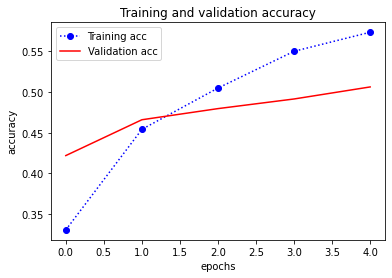

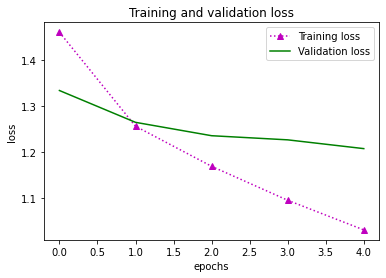

In [64]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
 
epochs = range(len(acc))
 
plt.plot(epochs, acc, 'ob:', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(loc='best')
 
plt.figure()
 
plt.plot(epochs, loss, '^m:', label='Training loss')
plt.plot(epochs, val_loss, 'g', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(loc='best')
 
plt.show()

Training loss is decreasing at each epochs and Training accuracy is increasing at each epochs.
Validation loss is decreasing too but the gap b/w the training and validation loss and accuracy is higher side and which means our model doesn't perform well on test data. Ergo,overfitting exists.
